In [1]:
import numpy as np
import requests

In [2]:
cities = ['Řevnice', 'Dobřichovice', 'Lety (Praha-západ)', 'Černošice']  # obce U Berounky
people = [3570, 3722, 1563, 7331]  # počet obyvatel k lednu 2020

In [ ]:
# download new source file
# it takes some time

r = requests.get('https://share.uzis.cz/s/dCZBiARJ27ayeoS/download?path=%2F&files=obec.csv')
with open('obec.csv', 'wb') as f:
    f.write(r.content)

In [3]:
first = True
with open('obec.csv', 'r', encoding='utf-8-sig') as f_in:
    lines = filter(lambda x: x[:4] == 'den;' or 'Černošice' in x, f_in)
    #data = genfromtxt(lines, delimiter=',')
    data = np.genfromtxt(lines,  dtype=None, delimiter=';', names = True, encoding='utf8')

In [4]:
fdata = {}
for c in cities:
    myfilter = np.asarray([c])
    fdata[c] = data[np.in1d(data['obec_nazev'], myfilter)]

In [5]:
%matplotlib notebook
from pylab import *

<IPython.core.display.Javascript object>


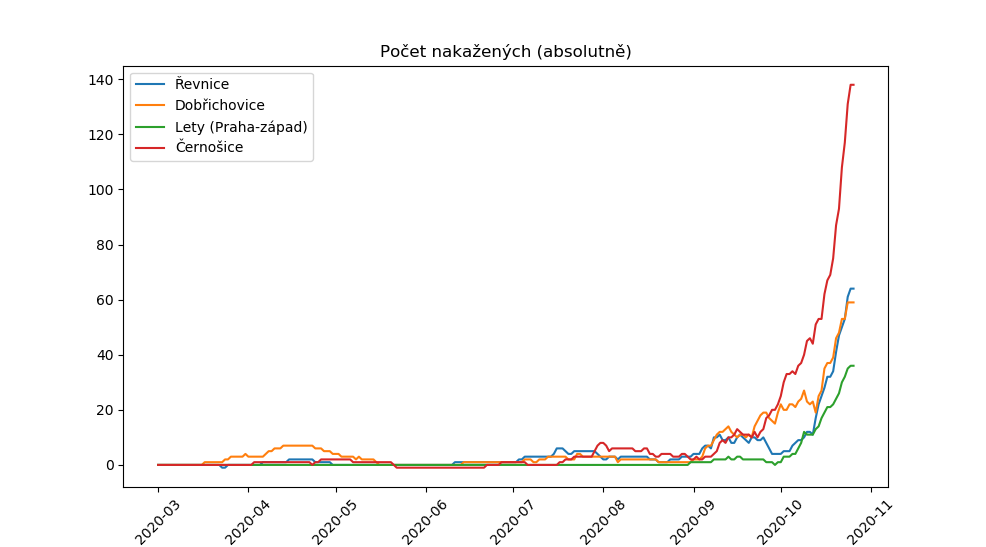

In [6]:
#nakazenych absolutne
for c in cities:
    plot([datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in fdata[c]['datum']],
         fdata[c]['aktualne_nemocnych'], label=c)  # 
legend()
title("Počet nakažených (absolutně)")
xticks(rotation=45)
show()

<IPython.core.display.Javascript object>


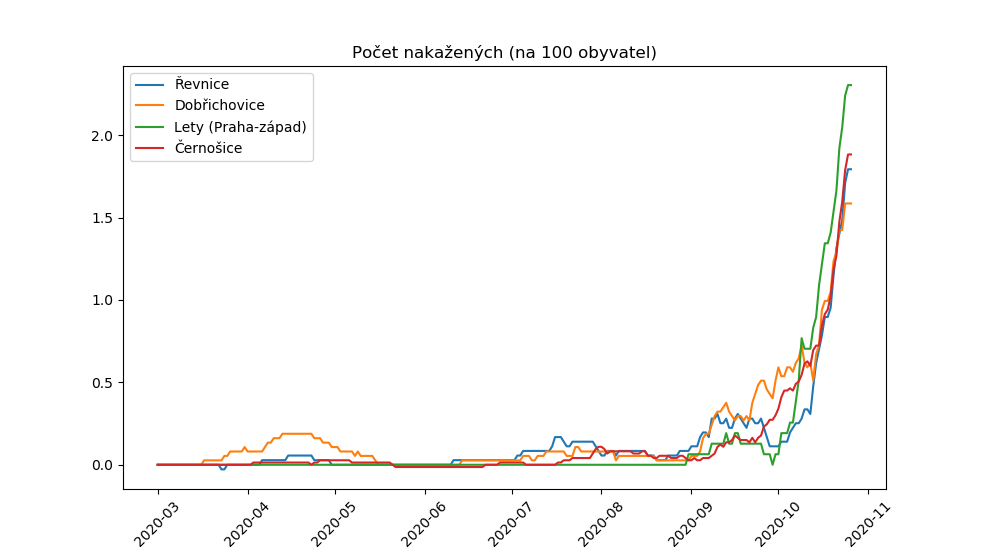

In [7]:
#nakazenych na 100 obyvatel
for c, p in zip(cities,people):
    plot([datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in fdata[c]['datum']],
         fdata[c]['aktualne_nemocnych'] / p * 100, label=c)  # 
legend()
title("Počet nakažených (na 100 obyvatel)")
xticks(rotation=45)
show()

<IPython.core.display.Javascript object>


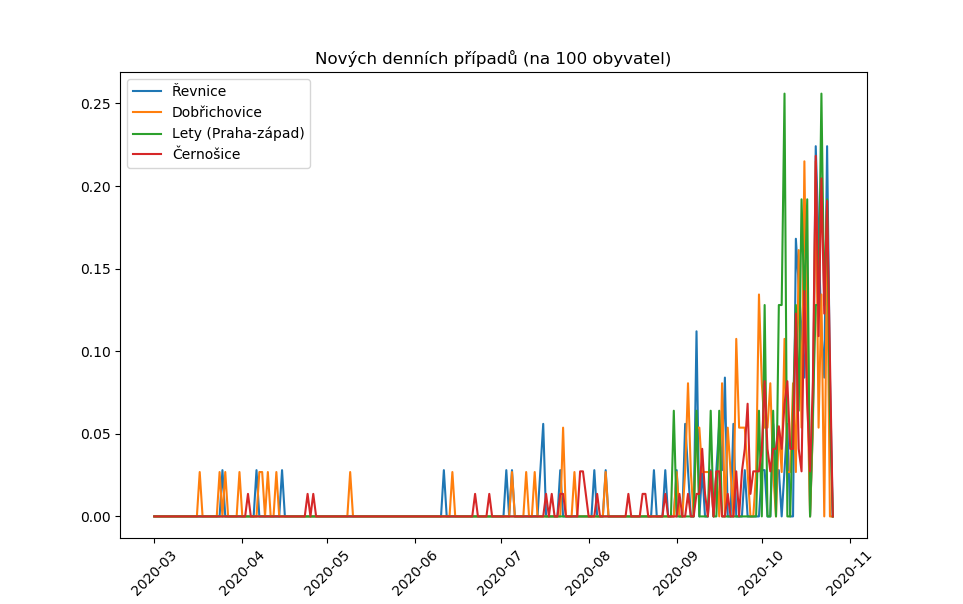

In [8]:
#nove pripady na 100 obyvatel
for c, p in zip(cities,people):
    plot([datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in fdata[c]['datum']],
         fdata[c]['nove_pripady'] / p * 100, label=c)
legend()
title("Nových denních případů (na 100 obyvatel)")
xticks(rotation=45)
show()